# Nutrition Predictor 🦐
December 15th, 2022

Henry Chen (henchen@seas.upenn.edu)

Yash Nakadi (ynakadi@seas.upenn.edu)

Grace Lee (glee1@seas.upenn.edu)

![](https://drive.google.com/uc?export=view&id=1Oe9SAZlyKBj_hnSBDqmVCh6fKecW1URI)



# Introduction ❕
Every day we make choices concerning what we eat, how much we eat, and so on; this dataset, and the analysis we conduct with it, allows us to learn more about the foods we have access to and from there which foods we should select and why. This project will figure out which food items/ingredients to prioritize, and since the dataset encompasses hundreds of thousands of unique food items, it will open our eyes to the diversity of food items available, along with the various ways. 
In addition to learning more about the food items we interact with every day, we also seek to learn more about popular metrics that relate to nutrition. In addition to nutrient information, the dataset contains ratings in the form of Nutri-score, along with a letter grade ranking each food item from A to E, A being the best. We want to learn more about how these scores and grades are calculated, and if the metrics’ calculations are reasonable. To do so, we will implement a variety of modeling techniques, while of course preprocessing our data beforehand to address the main concern of multicollinearity.

Specifically with the modeling, we implement linear regression, logistic regression with PCA adjusting, and a variety of aggregated decision tree classifiers. We wanted to determine if we could accurately predict the Nutri-score of a food item with its nutritional features; then once we encoded the nutritional grades to a binary variable we used logistic regression and decision tree ensembles to learn which nutrients contributed the most to a high nutritional score.

Ultimately, we are focusing solely on learning as much about the given nutritional information as we can; by focusing on which nutrients are the most important, we can focus on foods that are richest in that feature. Our project is unique in that our work results in highly accurate classifiers determining what to focus on when making food choices, so this project is extremely applicable to one’s day-to-day life and is incredibly useful.




---
# Setup & Imports 🗃️

We begin by importing necessary libraries such as Pandas, Sklearn, and the standard Python libraries.

In [82]:
# Importing Sklearn and Pandas
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import math

---
# Data Loading and Preprocessing 💽


### Read and Display data
We are using one TSV file for this project from a Kaggle dataset. Each row in this dataset represents one food object (e.g. Organic Hazelnuts) and its particular attributes (e.g. total fat, calcium, vitamins, etc.). We will first load the dataset into a dataframe `df` and then begin cleaning it. 


In [83]:
# Reading our csv file 
df = pd.read_csv('data.tsv', sep='\t')

# view df to make sure the import was successful
df.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.



,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN

In [84]:
# the original dataframe has 163 columns
df.shape

(356027, 163)

---
# Cleaning Data 🧹
After loading in the data from the TSV file, we will clean the data. We will first drop columns that have more than 67% null values and remove duplicate rows in the dataframe `df`.

In [85]:
# dropping columns with more than 50% NULL values and removing duplicate rows
cleaned_df = df.dropna(axis=1, thresh=round(len(df) * 0.33))
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'brands', 'brands_tags', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

We then drop the columns that are irrelevant/redundant within the scope of our project. Columns such as a broken URL to an article about a food object, the creation time of that particular article, additive tags, etc. This will make our dataframe concise.

In [86]:
# removing unnecessary columns that we will not use
cleaned_df = cleaned_df.drop(['code', 'url', 'creator', 'created_t', 'created_datetime', 
                              'last_modified_t', 'last_modified_datetime', 'countries', 
                              'countries_tags', 'brands_tags', 'additives_n', 'additives', 
                              'additives_tags', 'states', 'states_tags', 'states_en', 
                              'nutrition-score-fr_100g', 'ingredients_from_palm_oil_n',
                              'ingredients_that_may_be_from_palm_oil_n'], axis=1)

We will then rename and clean column names to make them simplier and more readable (e.g. renaming `ingredients_text` to simply `ingredients`).  

In [87]:
# renaming columns
cleaned_df = cleaned_df.rename(columns={'countries_en': 'countries',
                                        'ingredients_text': 'ingredients',
                                        'additives_en': 'additives',
                                        'nutrition_grade_fr': 'nutrition_grade',
                                        'nutrition-score-uk_100g': 'nutrition_score'})

# replacing the suffix `_100g`
old_columns = list(cleaned_df)
cleaned_df.rename(columns={old_columns[idx]: name[:-5] for  (idx, name) in enumerate(old_columns) if name.endswith('_100g')}, inplace=True)
cleaned_df.columns = cleaned_df.columns.str.replace('-', '_')

# view info information regarding data
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356027 entries, 0 to 356026
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   product_name     338515 non-null  object 
 1   quantity         119285 non-null  object 
 2   brands           326977 non-null  object 
 3   countries        355752 non-null  object 
 4   ingredients      283893 non-null  object 
 5   serving_size     216621 non-null  object 
 6   additives        170189 non-null  object 
 7   nutrition_grade  254856 non-null  object 
 8   pnns_groups_1    129006 non-null  object 
 9   pnns_groups_2    132689 non-null  object 
 10  energy           295367 non-null  float64
 11  fat              279497 non-null  float64
 12  saturated_fat    263823 non-null  float64
 13  trans_fat        143443 non-null  float64
 14  cholesterol      144170 non-null  float64
 15  carbohydrates    279220 non-null  float64
 16  sugars           279186 non-null  floa

In [88]:
# display cleaned_df
pd.options.display.max_columns = None
cleaned_df.head(5)

,product_name,quantity,brands,countries,ingredients,serving_size,additives,nutrition_grade,pnns_groups_1,pnns_groups_2,energy,fat,saturated_fat,trans_fat,cholesterol,carbohydrates,sugars,fiber,proteins,salt,sodium,vitamin_a,vitamin_c,calcium,iron,nutrition_score
0,Farine de blé noir,1kg,Ferme t'y R'nao,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),NaN,d,NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
2,Peanuts,NaN,Torn & Glasser,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),NaN,b,NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
3,Organic Salted Nut Mix,NaN,Grizzlies,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),NaN,d,NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0
4,Organic Polenta,NaN,Bob's Red Mill,United States,Organic polenta,35 g (0.25 cup),NaN,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have our cleaned dataset, we can move on to data analysis.

---
# Exploratory Data Analysis (EDA) 📊
We will perform Exploratory Data Analysis (EDA) to analyze our dataset to summarize its characteristics. We will use charts and graphs to help visualize what are data represents and to discover trends and patterns.

### Serving Size Extraction
We want to see the ranges of serving sizes in the data to see how they compare to the 100g measurement size for the features.

In order to do this, we extract the serving sizes from the serving_size column, converting the general objects to usable numerical data using custom functions. Since units are critical in understanding the context and meaning of data, we also extract the units as a string and store them separately.

In [89]:
import re
import string

# extract the numerical serving size from the inputted object
def extract_serving_size(inp):
  # locate the number within the input
  temp = re.findall('\d+[.,/]?\d*', str(inp))
  # catch the NaN case
  if len(temp) < 1:
    return -1
  # depending on the format of the number, convert to numerical type
  try:
    return int(temp[0])
  except:
    try:
      return float(temp[0])
    except:
      try:
        temp = temp[0].replace(",", ".")
        return float(temp[0])
      except:
        # catch errors
        return -1

# extract the unit (as a string) from the inputted object
def extract_serving_unit(inp):
  ana = str(inp).lower()
  # the possible valid units are {ml, cl, mg, g}, all objects that do not
  # fall within these options are NA values.
  if ("ml" in ana):
    return "ml"
  elif ("cl" in ana):
    return "cl"
  elif ("mg" in ana):
    return "mg"
  elif ("g" in ana):
    return "g"
  else:
    # if nothing works, it must be an NA value
    return None

In [90]:
cleaned_df['cleaned_serving_size'] = cleaned_df['serving_size'].apply(lambda x : extract_serving_size(x))
cleaned_df['cleaned_serving_unit'] = cleaned_df['serving_size'].apply(lambda x : extract_serving_unit(x))
cleaned_servingsizes_df = cleaned_df[['product_name', 'cleaned_serving_size', 'cleaned_serving_unit']]
# display statistics for the serving sizes
cleaned_servingsizes_df.groupby('cleaned_serving_unit').describe()

cleaned_serving_size                                      \
                                    count        mean          std  min   25%   
cleaned_serving_unit                                                            
cl                                 1185.0   27.157173    16.118911  1.0  20.0   
g                                186480.0   63.348014    67.956823 -1.0  28.0   
mg                                   25.0  680.600000  1978.040529 -1.0  55.0   
ml                                28164.0  185.793962   134.797910  0.0  30.0   

                                             
                        50%    75%      max  
cleaned_serving_unit                         
cl                     25.0   33.0    255.0  
g                      39.0   85.0   2091.0  
mg                     85.0  500.0  10000.0  
ml                    240.0  240.0   3000.0

### Correlation Heatmap

We first want to find what kind of correlations are in the data. We will use a correlation matrix to help us determine which columns have some sort of correlation. For example, is there a correlation between vitamins and energy?  Also for our Machine Learning models later on, we want to look for correlations between features since some models (e.g. Linear Regression) do not work well with strong multicollinearity.

We will use a heatmap to visualize the correlations.



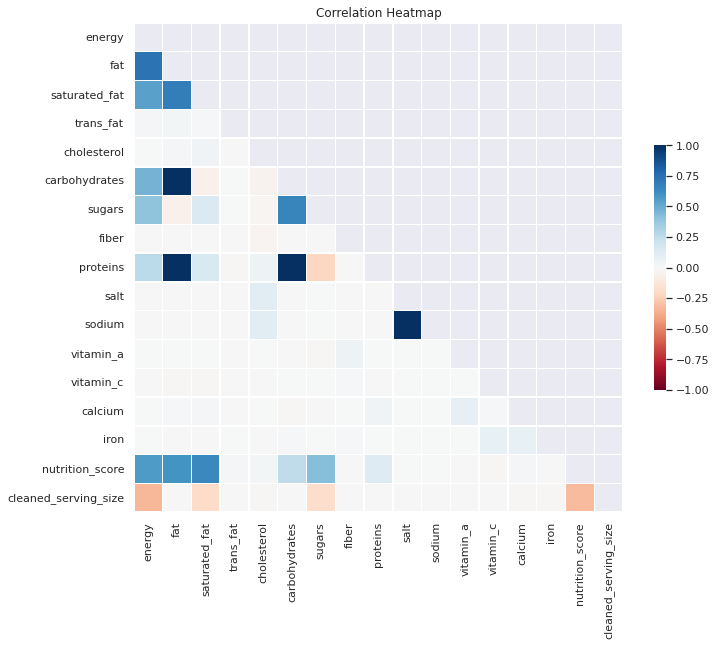

In [91]:
# creating the correlation matrix from our cleaned dataframe
correlation_matrix = cleaned_df.corr()
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show() 

We can see from our generated heatmap that there are multiple correlations. We see that there is a strong correlation between proteins/fat and fat/carbohydrates. And of course there is a correlation between salt/sodium. We note these correlations and would not include both correlated features in our machine learning models.

### Nutrition Grade Distribution
We would also like to examine the distribution of the nutrition grades and to see if the data would be heavily skewed (e.g. there are way more "healither" foods than "unhealthier" foods. This is important to know as this directly affects the training process of our machine learning models.

In [92]:
# create a dataframe for the bar chart and group by grade
bar_df = cleaned_df.groupby('nutrition_grade', as_index=False).agg({'product_name': 'count'})
bar_df = bar_df.rename(columns={'product_name': 'count'})
sns.set_theme(style='darkgrid')

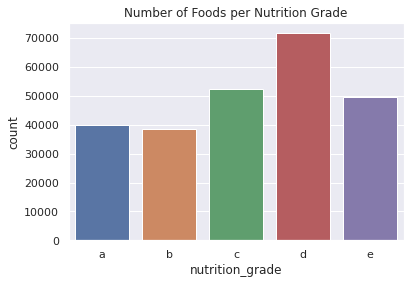

In [93]:
g = sns.barplot(data=bar_df, x='nutrition_grade', y='count', dodge=False)
plt.title('Number of Foods per Nutrition Grade')
plt.show()

From this bar chart, we can see the distribution is not terribly skewed, meaning our models would not be terrible bias toward particular grades.

### Countries Distribution
We would also like to examine the distribution of the number of foods in the dataset per country. We suspect that there will be outliers and might cause some bias issues. We included a bar chart and an interactive map.

<ipython-input-94-9d2cad34009e>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



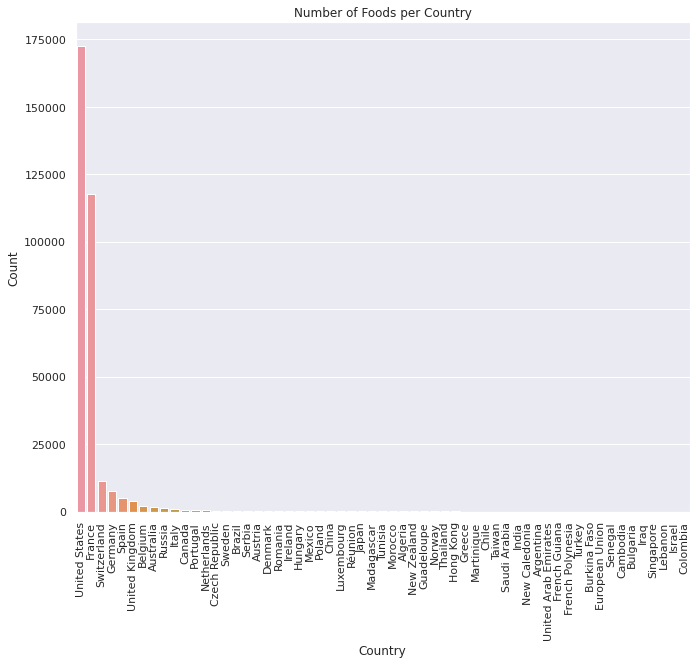

In [94]:
# create countries df for graph
countries_df = cleaned_df.groupby('countries', as_index=False).agg({'product_name': 'count'})
countries_df = countries_df.rename(columns={'product_name': 'Count', 'countries' : 'Country'})
countries_df['name_bool'] = countries_df['Country'].apply(lambda x: 0 if ',' in x else 0 if 'Other' in x else 0 if 'fr' in x else 1)
countries_df = countries_df[countries_df['name_bool']  == 1][['Country','Count']].reset_index(drop=True)
countries_df = countries_df.sort_values(by='Count', ascending=False)[countries_df['Count'] > 30]

# display graph
plt.figure(figsize=(11, 9))
g = sns.barplot(data=countries_df, x='Country', y='Count', dodge=False)
plt.title('Number of Foods per Country')
plt.xticks(rotation=90)
plt.show()

In [95]:
fig = px.choropleth(data_frame = countries_df, locations="Country", locationmode = 'country names',
                    color="Count", color_continuous_scale=px.colors.sequential.Electric_r,
                    labels = {'Name' : 'Number of Unique Food Items'}, 
                    title = 'Number of Unique Food Items in Each Country')

fig.show()

As expected, the vast majority of foods in this dataset are in the United States. Thus, we will not include the country column into our list of features. 

---
# Modeling 🤖

Now that we have performed EDA and have cleaned our dataset, we will now begin the Modeling process. We first need to designate our features variables and label variable into their respective dataframes. As discussed earlier, we do not want to include correlated features.

In [96]:
# we will only include rows where the nutrition grade is not null
nut_scores_df = cleaned_df[cleaned_df['nutrition_grade'].notna()]

feature_list = ['fat', 'saturated_fat', 'trans_fat', 'cholesterol',
                             'carbohydrates', 'sugars', 'fiber', 'proteins', 'sodium',
                             'vitamin_a', 'vitamin_c', 'calcium', 'iron']
# our features dataframe, selecting particular, uncorrelated features
features_df = nut_scores_df[feature_list]
features_df = features_df.fillna(0)

# encoding nutrition grade rating with a score of 1 if the grade is an 'a' or a 'b'. 0 otherwise
nut_scores_df['nutrition_grade_rating'] = nut_scores_df.nutrition_grade.apply(lambda x: 1.0 if x <= 'b' else 0.0)
labels_df = nut_scores_df['nutrition_grade_rating']

# combined dataframe that we will use for spark 
combined_df = pd.concat([features_df, labels_df], axis=1)

<ipython-input-96-c21e6733e98d>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Linear Regression
We will first use Linear Regression to see how correlated our features and nutrition score are. 

In [97]:
# get the rows of cleaned_df where nutrition score is not null
nut_scores_df = cleaned_df[cleaned_df['nutrition_score'].notna()]

# the labels are the nutrition_score 
labels_linear = nut_scores_df['nutrition_score']

# getting the train and test sets
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features_df, labels_linear, random_state=seed, test_size=0.2)

# Initializing the model and fitting it on the training set
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# predicting and getting the score
y_pred = linreg.predict(x_test)
score = linreg.score(x_test, y_test)

score

0.625825258530341

Given a score of ~0.65, we conclude that Linear Regression is not the best model to determine the correlation between our features and nutrition score. Furthermore, we graph the results of the model's predictions below and expectedly, we can not conclude that there is a linear correlation between these features.

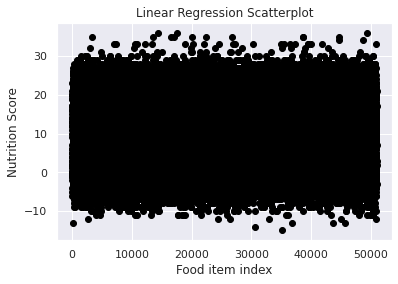

In [98]:
plt.scatter(np.arange(0,len(x_test),1), y_test, color="black")
plt.ylabel('Nutrition Score')
plt.xlabel('Food item index')
plt.title("Linear Regression Scatterplot")
plt.show()

### Logistic Regression
Now we will use Logistic Regresion to see the correlation between our features and nutrition grade. From before, we have given a score of 1 to good nutrition grades, and a score of 0 to bad nutrition grades. Thus, Logistic Regression would be a good model the correlation and to see how accurate its predictions can be.

In [ ]:
# Initialize random seed to 42
seed = 42

# Split the dataset so that 80% of entries are being used for the training dataset, then 20% for the test set
x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, random_state=seed, test_size = 0.2)

# Initialize and train the Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Use this model on our test set to predict nutrition grades, and see how accurate we are
y_pred = logreg.predict(x_test)
log_acc = logreg.score(x_test, y_test)
log_acc

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9113827199246646

Looks like we have a good model running. Let's test it with three examples. In the first example we will focus on foods that contain cookies; in the second we will focus on foods that have vegetables; finally, we will focus on foods that have chicken.

In [ ]:
# Example #1: cookie products
# Recall that a label 1 means the food has a high nutrition grade, and 0 is a low nutrition grade
# We should expect far more 0 labels then 1 labels for this example 

example1_df = cleaned_df[cleaned_df.product_name.str.contains('Cookie',na=False)]
example1_df = example1_df[feature_list]
example1_df = example1_df.fillna(0)
pred = logreg.predict(example1_df)
pred_df = pd.DataFrame(pred).rename(columns={0:'Label'})
pred_df['Count'] = pred
label_prediction_1_df = pred_df.groupby(by='Label').count()
label_prediction_1_df

,Count
Label,
0.0,5447
1.0,171


In [ ]:
# Example #2: vegetable products
# We should expect far more 1 labels then 0 labels for this example 

example2_df = cleaned_df[cleaned_df.product_name.str.contains('Vegetable',na=False)]
example2_df = example2_df[feature_list].fillna(0)
pred2 = logreg.predict(example2_df)
pred2_df = pd.DataFrame(pred2).rename(columns={0:'Label'})
pred2_df['Count'] = pred2
label_prediction_2_df = pred2_df.groupby(by='Label').count()
label_prediction_2_df

,Count
Label,
0.0,807
1.0,1164


In [ ]:
# Example #3: chicken
# For this one there should be a mixed bag, as chicken can be a part of both healthy and unhealthy foods
example3_df = cleaned_df[cleaned_df.product_name.str.contains('Chicken',na=False)]
example3_df = example3_df[feature_list].fillna(0)
pred3 = logreg.predict(example3_df)
pred3_df = pd.DataFrame(pred3).rename(columns={0:'Label'})
pred3_df['Count'] = pred3
label_prediction_3_df = pred3_df.groupby(by='Label').count()
label_prediction_3_df

,Count
Label,
0.0,2354
1.0,1898


Now we want to do the same idea, but with PCA in order to reduce the complexity of our model, as well as get a better idea of which features have the most importance when it comes to assigning a grade.

In [ ]:
# PCA Logistic Regression

# Step 1: initialize PCA and StandardScaler

# Import relevant models and tools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize and scale the dataset comprised of features
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

# Initialize and fit the PCA model
pca = PCA()
train = pca.fit_transform(x_train_sc)
train.shape

(203884, 13)

Now that we have a PCA model, we can compute the explained variance for our components and determine how many we need to reach an 80% threshold, meaning the minimum number of components needed to achieve 80% of explained variance.

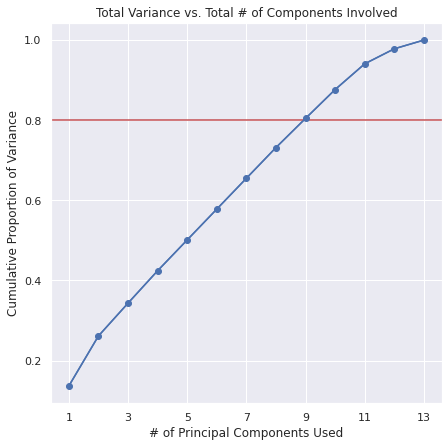

In [ ]:
# Step 2: Determine which principle components provide the most variance,
# and determine the minimum number of components needed to reached a threshold
# percentage of explained variance
explained_variance_ratios = list(pca.explained_variance_ratio_)

# create a list of variances, where the ith value is the variance explained by
# the ith principle component plus the combined variance of the first i - 1 principle
# components
cum_evr = [explained_variance_ratios[0]]
for i in range(1, len(explained_variance_ratios)):
  cum_evr.append(cum_evr[i - 1] + explained_variance_ratios[i])

# Plot the graph, keeping in mind there are 13 components to keep track of
index = [x for x in range(1,14)]

# Create a Pandas dataframe from which we can plot a line graph that shows the
# datapoints
graph = pd.DataFrame()
graph['# of Principal Components Used'] = index
graph['Cumulative Proportion of Variance'] = cum_evr

# Establish the size of the graph and provide an accurate title
plt.figure(figsize=(7,7))
plt.title('Total Variance vs. Total # of Components Involved')

# Create the line plot and define the x axis as the # of principal components,
# the y axis as the cumulative variance, as defined previously
sns.lineplot(data=graph, x = '# of Principal Components Used', y = 'Cumulative Proportion of Variance')


# Plot a line at y = 0.8, signifying the 80% threshold we are interested in, since
# we want the minimum number of components that constitute 80% of the explained variance
plt.axhline(y = 0.8, color = 'r', linestyle = '-')

# Add markers along the x axis so we can easily keep track of the # of components 
plt.xticks([x for x in range(1,14,2)])

# Display the graph
plt.plot(range(1,14), graph['Cumulative Proportion of Variance'], marker='o', color='b', label='line with marker')

# Based on the graph, we need 9 of the 13 principal components to reach 80%
# of explained variance

Now that we know the minimum number of components needed, we can re-initialize the PCA model and re-run the same steps as before.

In [ ]:
# Step 3: re-initialize the PCA with the optimal # of components (9), retrain and run
# the Logistic Regression model, and hopefully we see higher accuracy.
n = 9

# Like before, define, fit and transform the PCA model, but now with 9 components
pca2 = PCA(n_components=n)
x_train_pca = pca2.fit_transform(x_train_sc)
x_train_pca.shape

x_test_pca = pca2.transform(x_test_sc)
x_test_pca
# Using this training data set, fit the Logistic Regression model
log_reg_pca = LogisticRegression()
log_reg_pca_fit = log_reg_pca.fit(x_train_pca,y_train)

# Using this model, make predictions for the test data
y_pred = log_reg_pca_fit.predict(x_test_pca)

# Finally, we can see what the test accuracy is
test_accuracy = log_reg_pca.score(x_test_pca, y_test)
test_accuracy

0.8100918151141804

As mentioned previously, we are interested in seeing which nutrient groups have the most importance as it relates to assigning a high or low nutrition grade. We determine those components here.

In [ ]:
# number of components (as seen from the graph)
n = 9

# get the indices of the most important features for each component
most_important_features = [np.abs(pca2.components_[i]).argmax() for i in range(n)]
initial_feature_names = feature_list

# Using those indices, find the relevant features
most_important_names = [initial_feature_names[most_important_features[i]] for i in range(n)]

# Create a list of identical length that will rank the features in order of most explained variance
pc_list = ["PC"+str(x) for x in range(1, n+1)]

# Combine the two previous columns under one dataframe
df = pd.DataFrame()
df['Principal Component'] = pc_list
df['Nutrient'] = most_important_names
df

,Principal Component,Nutrient
0,PC1,fat
1,PC2,sugars
2,PC3,calcium
3,PC4,vitamin_a
4,PC5,sodium
5,PC6,fiber
6,PC7,trans_fat
7,PC8,cholesterol
8,PC9,vitamin_c


Here, we can see that proteins and other vitamins are the most important features that decide nutrition grade, which makes sense as a high amount of these nutrients usually means the food is 'healthy'.

### Decision Trees and Ensemble Models

We now want to see which features we can use to most accurately and effecitvely classify the data into our classes of highly and less-highly rated foods. We will again use the reduced-dimension training sets from our PCA.

We will first create a single Decision Tree classifier model, and fit out training data to it, then test it against our reduced-dimension test sets.


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(min_samples_split=0.01, criterion="entropy").fit(x_train_pca, y_train)
dtree_prediction = dtree.predict(x_test_pca)
accuracy_score(dtree_prediction, y_test)

0.9038491720944832

When initializing our classifier, in order to avoid the common pitfalls of decision trees and improve the quality of our model, we set some of the hyperparameters. The hyperparameter min_samples_split is set to 0.01, so that the classifier does not overfit the model to our training data too much and create expontential tiny classification branches.

It seems that the accuracy for our decision tree on our test set is pretty good. We will plot this new tree classifier to a visualized tree diagram in order to see the exact classifications and specific data splits.

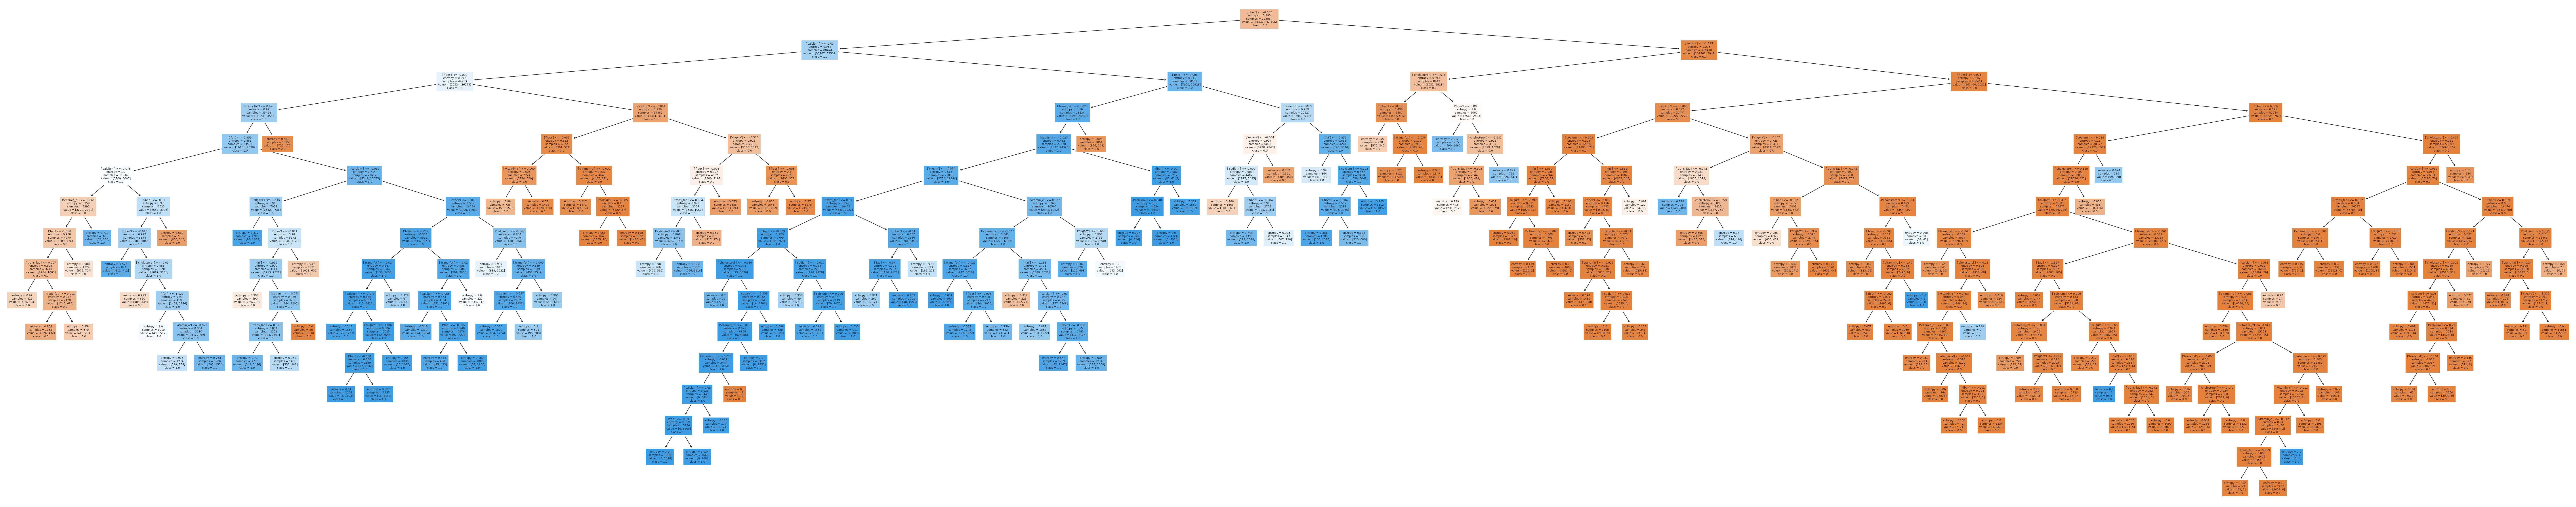

In [ ]:
plt.figure(figsize=(100, 20), dpi=150)
# get nparrays of strings, containing the features and class labels corresponding to x_test_pca and y_test_pca
dtree_features_list = df[['Nutrient']].to_numpy()
dtree_labels_list = labels_df.apply(lambda x : str(x)).to_numpy()
# plot the tree with our labels
tree.plot_tree(dtree, feature_names=dtree_features_list, class_names=dtree_labels_list, fontsize=6, filled=True)

# click on the diagram (output) to zoom in and out on the nodes
plt.show()

Just for comparisons' sake, let us see what the training accuracy for our model is.

In [ ]:
print(accuracy_score(dtree.predict(x_train_pca), y_train))

0.9056914716211178


We can try to improve these numbers with ensemble models. By aggregating the predictions of many decision trees, these will reduce any unnecessary granularity within our model and provide an even better fit.

In [ ]:
from sklearn.ensemble import BaggingClassifier

dctree = DecisionTreeClassifier()
bag = BaggingClassifier(dctree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(x_train_pca, y_train)
accuracy_score(bag.predict(x_test_pca), y_test)

0.949050459075571

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(x_train_pca, y_train)

accuracy_score(forest.predict(x_test_pca), y_test)

0.9496193988856627

As we can see, the aggregation helped improve our model to be even more accurate on our testing data, implying that we are getting closer to modeling a true-- that is, accurate to real life-- relationship between features of food items and and their nutrition grades.

---
## Spark & ML

We will use Spark to not only build our next model, but to also calculate the confusion matrix and accuracy. We first install and import the relevant libraries and packages.

In [ ]:
!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml').getOrCreate()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
--2022-12-16 03:47:01--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-12-16 03:47:02 ERROR 404: Not Found.

tar: spark-3.1.2-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https

In [ ]:
%load_ext sparkmagic.magics

The sparkmagic.magics extension is already loaded. To reload it, use:
  %reload_ext sparkmagic.magics


In [ ]:
import networkx as nx
import sqlite3
import pandas as pd
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.mllib.evaluation import MulticlassMetrics

try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

We create our Spark Dataframe from our combined dataframe (consisting of our features and labels) from before.

In [ ]:
data_sdf = spark.createDataFrame(combined_df)
data_sdf

DataFrame[fat: double, saturated_fat: double, trans_fat: double, cholesterol: double, carbohydrates: double, sugars: double, fiber: double, proteins: double, sodium: double, vitamin_a: double, vitamin_c: double, calcium: double, iron: double, nutrition_grade_rating: double]

We then need to create our feature column that is all of our features concatenated and a labels column. We then will split our data into a training Spark dataframe and test Spark dataframe.

In [ ]:
# we need to organize what features to use for our VectorAssembler
all_columns = data_sdf.columns
drop_columns = ['nutrition_grade_rating']
columns_to_use = list(set(all_columns) - set(drop_columns))

# creating the VectorAssembler with output 'features'
va = VectorAssembler(outputCol='features')
va.setInputCols(columns_to_use)

# creating the Pipeline with the Assembler as the only stage. Then fit and transform data_sdf
pipe = Pipeline(stages=[va])
modified_data_sdf = pipe.fit(data_sdf).transform(data_sdf)

# our training dataframe and test dataframe
random_seed = 42
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed = random_seed)

### Modeling and Confusion Matrix
Now that we our data is ready, we will begin to train a Logistic Regression model to our data and predict whether the grade will be high (an A or a B) or low (C, D, E). We will later depict a Confusion Matrix to calculate accuracy, precision, recall, F1 score and other metrics. 

In [ ]:
# create our Logistic Regression model and train on our training set
lr = LogisticRegression(featuresCol='features', labelCol='nutrition_grade_rating')
model = lr.fit(train_sdf)

In [ ]:
# our training accuracy
train_accuracy = model.summary.accuracy
train_accuracy

0.9053696772896055

In [ ]:
# predicting the label (nutrition_grade_rating) based on the test set
predictions = model.transform(test_sdf).select('prediction', 'nutrition_grade_rating')
predictions

DataFrame[prediction: double, nutrition_grade_rating: double]

We will now create our Confusion Matrix using [MulticlassMetrics](https://spark.apache.org/docs/latest/mllib-evaluation-metrics.html), and we calculate relevant metrics.

In [ ]:
# selecting the appropriate columns
rdd = predictions.rdd
predictionAndLabels = rdd

# creating the confusion matrix
metrics = MulticlassMetrics(predictionAndLabels)
cm = metrics.confusionMatrix().toArray()

Using this confusion matrix, we can determine the quality of our model using various metrics. Here, in addition to test accuracy, we checked precision, recall and f-measure.

In [ ]:
# calculating the accuracy of our model
test_accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])

# Additional metrics
precision = cm[1][1] / (cm[1][1]+cm[0][1])
recall = cm[1][1] / (cm[1][1]+cm[1][0])

f_measure = (2 * precision * recall) / (precision + recall)

final_string = "Our model's test accuracy is {}, the precision is {}, the recall is {}, and the f-measure is {}"\
.format(round(test_accuracy,3), round(precision,3), round(recall,3), round(f_measure,3))

final_string

"Our model's test accuracy is 0.908, the precision is 0.838, the recall is 0.874, and the f-measure is 0.856"

Finally, we plot the confusion matrix as a heatmap.

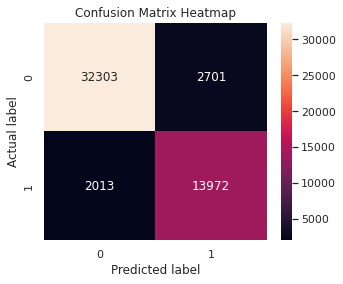

In [ ]:
# plotting the confusion matrix as a heatmap
f, ax = plt.subplots(figsize=(5, 4))

g = sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix Heatmap")
plt.show()

Our discovered accuracy is relatively high, meaning our logistic regression model mostly predicts the right label (the correct nutrition grade). From our previous logistic regression model in the earlier sections, we saw that our model also had high accuracy. Thus, it is expected that we also received high accuracy for our combined dataframe (both features and labels). We also note that we have high precision and recall, meaning that our model is adept at avoiding both false positives and false negatives.

---
# Conclusions Drawn 📝

Our EDA answered many important questions for us like how/if are features were correlated, which features are correlated, is our data normally distributed for nutrition grades, what kind of bias could there be in our data, etc. We discovered, through our visualizations, what kind of nutrients are correlated, how nutrition grade was distributed, and where the most popular foods where from in this dataset.

We found what features were most correlated with each other (proteins/carbs/fat and sodium/salt). We also dug a bit more extra research and found that food is highly rated based on proteins and carbs, which matches our results that those nutrients affect the grade/score.

---
# Challenges Encountered 💢
From the beginning, we've had a lot of trouble with our dataset; as it has well over 300,000 rows, Colab takes quite a while for the TSV file to completely upload. Quite frequently, Colab would crash and we would often have to restart our runtime / refresh the page. After crashing, sometimes the data would not load properly, forcing us to refresh. 

Aside from Colab issues, we sometimes had trouble with our Linear Regression Model; our score would sometimes fluctuate from around 0.7 to a negative value. 

Finally, we faced struggles with some of our modeling. Especially in the decision tree section, it took many rounds of validation and learning to tune our hyperparameters effectively in order to get a decision tree could best fit our data. Visualizing the decision trees and other models required some more exploration into the python data visualization libraries, and tested our conceptual understanding of the models we were trying to build. After numerous runs, we were able to create elegant and clean models that are good fits for our data and our goals.


---
# Potential Next Steps / Future Direction 💭
From what we have so far, we have considered also incorporating other datasets that coincide well with our current dataset. For example, ideally we would have another dataset that we could join with our current dataset to learn more about particular foods. We could also join our datasets with public health datasets to determine correlations between the ‘nutrition_score’ and the actual health of consumers.

A lot of foods in this dataset are from the US. Ideally, we would have a uniform distribution of foods from multiple countries. To remove this bias, we would simply undersample the number of foods from the US. Perhaps this would give us more well-fit models.

We could explore other features of our current dataset that we were not fully able to take advantage of this time: for example, we could investigate the mysterious 'energy' label from our dropped lists, and try to determine how it was calculated and came to be, or test how brand name actually seems to make a difference in nutrition facts of our daily foods. Since we chose a highly practical dataset and topic in order to explore its real-world applications, we will still have many routes we can take to further deepen our research on this subject.